In [66]:
import pandas as pd
import re

In [122]:
erData = pd.read_csv("Emergency_Department_Encounters_and_Admits_by_Principal_Diagnosis_Group_2010-2014.csv")
hospitalData = pd.read_csv("Hospital_Building_Data.csv")

In [123]:
erData = erData[erData["Source"]=="ED Visit"]
temp = erData.pivot(index='FACILITY_NAME', columns='Principal Diagnosis Group', values='Count')

erData = erData.drop('Principal Diagnosis Group', 1)
erData = erData.drop('Count', 1)
temp["FACILITY_NAME"] = temp.index
erData = pd.merge(erData, temp, on="FACILITY_NAME", how="right")
erData = erData.drop_duplicates(subset="FACILITY_NAME")

In [140]:
temp.columns

Index([u'All Pregnancies', u'Births', u'Blood/Blood-forming Organs',
       u'Circulatory', u'Congenital Anomalies (Birth Defects)', u'Digestive',
       u'Endocrine/Metabolism', u'Genitourinary', u'Infections',
       u'Injuries/Drugs/Complications', u'Invalid', u'Musculoskeletal',
       u'Neoplasms', u'Nervous & Sensory Systems',
       u'Other Reasons for Health Services', u'Perinatal Disorders',
       u'Psychoses & Neurosis', u'Respitory', u'Skin Disorders', u'Symptoms',
       u'FACILITY_NAME'],
      dtype='object', name=u'Principal Diagnosis Group')

In [126]:
erData.head()

,Year,oshpd_id,FACILITY_NAME,COUNTY_NAME,Type_Of_Control,ED_Level,Source,All Pregnancies,Births,Blood/Blood-forming Organs,...,Invalid,Musculoskeletal,Neoplasms,Nervous & Sensory Systems,Other Reasons for Health Services,Perinatal Disorders,Psychoses & Neurosis,Respitory,Skin Disorders,Symptoms
0,2014,106010735,ALAMEDA HOSPITAL,ALAMEDA,Public - City or County,Emergency - Basic,ED Visit,176,NaN,42,...,1,1078,18,712,847,1,668,1154,668,3036
19,2014,106010739,ALTA BATES SUMMIT MED CTR-ALTA BATES CAMPUS,ALAMEDA,Nonprofit - Corporation,Emergency - Basic,ED Visit,1990,NaN,225,...,1,2805,96,1763,1317,28,3445,2770,1678,8628
38,2014,106010776,CHILDRENS HOSPITAL AND RESEARCH CTR AT OAKLAND,ALAMEDA,Nonprofit - Corporation,Emergency - Basic,ED Visit,32,1,190,...,2,1204,30,2893,1041,140,385,6644,1621,9384
58,2014,106010846,HIGHLAND HOSPITAL,ALAMEDA,Public - City or County,Emergency - Basic,ED Visit,1350,NaN,182,...,NaN,6462,259,3741,8026,17,3202,4278,3505,12896
76,2014,106010856,KAISER FND HOSP - OAKLAND CAMPUS,ALAMEDA,Nonprofit - Corporation,Emergency - Basic,ED Visit,834,4,219,...,2,3054,53,2279,2303,32,1502,3711,1571,12288


In [76]:
hospitalData.head()

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,Building Code,Building Code Year,Year Completed,Count,Location 1
0,01 - Alameda,11210,Alameda Hospital,BLD-01278,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,44.17,4,Unknown,NaN,1926,1,"Alameda\n(37.7626572, -122.2538986)"
1,01 - Alameda,11210,Alameda Hospital,BLD-01279,Stephens Wing,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,35.00,3,1952 Uniform Building Code (UBC),1952,1956,1,"Alameda\n(37.7626572, -122.2538986)"
2,01 - Alameda,11210,Alameda Hospital,BLD-01280,West Wing,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,2,1964 Uniform Building Code (UBC),1964,1968,1,"Alameda\n(37.7626572, -122.2538986)"
3,01 - Alameda,11210,Alameda Hospital,BLD-01281,South Wing,In Service,3s,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,3,1976 California Building Code (CBC),1976,1983,1,"Alameda\n(37.7626572, -122.2538986)"
4,01 - Alameda,11210,Alameda Hospital,BLD-01282,Radiology Addition,In Service,5s,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,2,1985 California Building Code (CBC),1985,1995,1,"Alameda\n(37.7626572, -122.2538986)"


In [5]:
latValues = hospitalData["Location 1"].map(lambda loc: re.search("\d+(\.\d+)?", loc))
lonValues = hospitalData["Location 1"].map(lambda loc: re.search("-\d+(\.\d+)?", loc))

In [6]:
hospitalData["lat"] = [float(x.group(0)) for x in latValues]
hospitalData["lon"] = [float(x.group(0)) for x in lonValues]
hospitalData.head()

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,Building Code,Building Code Year,Year Completed,Count,Location 1,lat,lon
0,01 - Alameda,11210,Alameda Hospital,BLD-01278,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,44.17,4,Unknown,NaN,1926,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
1,01 - Alameda,11210,Alameda Hospital,BLD-01279,Stephens Wing,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,35.00,3,1952 Uniform Building Code (UBC),1952,1956,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
2,01 - Alameda,11210,Alameda Hospital,BLD-01280,West Wing,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,2,1964 Uniform Building Code (UBC),1964,1968,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
3,01 - Alameda,11210,Alameda Hospital,BLD-01281,South Wing,In Service,3s,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,3,1976 California Building Code (CBC),1976,1983,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
4,01 - Alameda,11210,Alameda Hospital,BLD-01282,Radiology Addition,In Service,5s,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,2,1985 California Building Code (CBC),1985,1995,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899


In [7]:
hospitalData["Facility Name"] = hospitalData["Facility Name"].map(lambda name: name.upper())
hospitalData.head()

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,Building Code,Building Code Year,Year Completed,Count,Location 1,lat,lon
0,01 - Alameda,11210,ALAMEDA HOSPITAL,BLD-01278,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,44.17,4,Unknown,NaN,1926,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
1,01 - Alameda,11210,ALAMEDA HOSPITAL,BLD-01279,Stephens Wing,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,35.00,3,1952 Uniform Building Code (UBC),1952,1956,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
2,01 - Alameda,11210,ALAMEDA HOSPITAL,BLD-01280,West Wing,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,2,1964 Uniform Building Code (UBC),1964,1968,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
3,01 - Alameda,11210,ALAMEDA HOSPITAL,BLD-01281,South Wing,In Service,3s,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,3,1976 California Building Code (CBC),1976,1983,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899
4,01 - Alameda,11210,ALAMEDA HOSPITAL,BLD-01282,Radiology Addition,In Service,5s,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,2,1985 California Building Code (CBC),1985,1995,1,"Alameda\n(37.7626572, -122.2538986)",37.762657,-122.253899


In [8]:
laHospitalData = hospitalData[hospitalData["County Code"] == "19 - Los Angeles"]
laHospitalData = laHospitalData.drop_duplicates(subset="Facility Name")
laHospitalData.head()

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,Building Code,Building Code Year,Year Completed,Count,Location 1,lat,lon
609,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.0,5,1967 Uniform Building Code (UBC),1967,1971,1,"Alhambra\n(34.0904846, -118.1440964)",34.090485,-118.144096
610,19 - Los Angeles,11399,ANTELOPE VALLEY HOSPITAL,BLD-00737,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,34.5,3,1952 County of Los Angeles (LAC),1952,1954,1,"Lancaster\n(34.6877708, -118.1579819)",34.687771,-118.157982
635,19 - Los Angeles,11417,BARLOW RESPIRATORY HOSPITAL,BLD-00730,Outpatient Clinic & Lab Addition,In Service,4,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,23.0,2,1976 California Building Code (CBC),1976,1980,1,"Los Angeles\n(34.0754242, -118.2474213)",34.075424,-118.247421
644,19 - Los Angeles,11441,BEVERLY HOSPITAL,BLD-00613,Service Building & Additions (Block I),In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,10.0,1,1949 Uniform Building Code (UBC),1949,1952,1,"Montebello\n(34.0150566, -118.1006393)",34.015057,-118.100639
655,19 - Los Angeles,11480,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,BLD-00622,Tibbitts Tower A,In Service,3,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,8,1979 California Building Code (CBC),1979,1987,1,"Los Angeles\n(34.0371506, -118.2654666)",34.037151,-118.265467


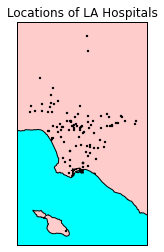

In [9]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

mapMargin = 0.1
lowerLat = min(laHospitalData["lat"]) - mapMargin
upperLat = max(laHospitalData["lat"]) + mapMargin
lowerLon = min(laHospitalData["lon"]) - mapMargin
upperLon = max(laHospitalData["lon"]) + mapMargin
m = Basemap(projection='cass',llcrnrlat=lowerLat,urcrnrlat=upperLat,\
            llcrnrlon=lowerLon,urcrnrlon=upperLon,lat_ts=20,resolution='h',lon_0=(upperLon + lowerLon)/2.0,lat_0=(upperLat + lowerLat)/2.0)
m.drawcoastlines()
m.fillcontinents(color='#ffcccc',lake_color='aqua',zorder=0)
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x, y = m(laHospitalData["lon"].values, laHospitalData["lat"].values)
m.scatter(x, y, marker='o', color='k', s=2)
plt.title("Locations of LA Hospitals")
plt.show()

In [127]:
laERData = pd.merge(laHospitalData, erData, left_on="Facility Name", right_on="FACILITY_NAME", how="left")
laERData.head(20)

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,...,Invalid,Musculoskeletal,Neoplasms,Nervous & Sensory Systems,Other Reasons for Health Services,Perinatal Disorders,Psychoses & Neurosis,Respitory,Skin Disorders,Symptoms
0,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.00,5,...,NaN,982,13,708,291,1,519,1186,554,2294
1,19 - Los Angeles,11399,ANTELOPE VALLEY HOSPITAL,BLD-00737,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,34.50,3,...,3,4916,217,6773,7174,237,3645,13238,3396,20237
2,19 - Los Angeles,11417,BARLOW RESPIRATORY HOSPITAL,BLD-00730,Outpatient Clinic & Lab Addition,In Service,4,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,23.00,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19 - Los Angeles,11441,BEVERLY HOSPITAL,BLD-00613,Service Building & Additions (Block I),In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,10.00,1,...,1,2253,36,1348,2475,27,1012,2280,1095,7161
4,19 - Los Angeles,11480,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,BLD-00622,Tibbitts Tower A,In Service,3,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,8,...,NaN,4173,160,3608,2785,242,3514,6414,2798,12742
5,19 - Los Angeles,11496,CASA COLINA HOSPITAL FOR REHABILITATIVE MEDICINE,BLD-02885,New Replacement Hospital,In Service,5s,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19 - Los Angeles,11410,CATALINA ISLAND MEDICAL CENTER,BLD-00725,Original Building,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,9.30,1,...,NaN,61,15,110,11,1,79,181,83,267
7,19 - Los Angeles,11891,CEDARS-SINAI MEDICAL CENTER,BLD-00384,Main Medical Center,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,156.00,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19 - Los Angeles,11510,CENTINELA HOSPITAL MEDICAL CENTER,BLD-00633,West Wing/ER Addition,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,12.00,1,...,NaN,4042,138,3197,3738,35,2631,4347,1735,11931
9,19 - Los Angeles,12874,CENTURY CITY DOCTORS HOSPITAL,BLD-00940,Main Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,145.42,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#laInjuriesDrugsComplications = laERData[laERData["Principal Diagnosis Group"] == "Injuries/Drugs/Complications"]
#print len(laInjuriesDrugsComplications)
#laInjuriesDrugsComplications.head(20)

108


,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,...,lon,Year,oshpd_id,FACILITY_NAME,COUNTY_NAME,Type_Of_Control,ED_Level,Source,Principal Diagnosis Group,Count_y
8,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.00,5,...,-118.144096,2014,106190017,ALHAMBRA HOSPITAL MEDICAL CENTER,LOS ANGELES,Investor - Partnership,Emergency - Basic,ED Visit,Injuries/Drugs/Complications,2731
25,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.00,5,...,-118.144096,2014,106190017,ALHAMBRA HOSPITAL MEDICAL CENTER,LOS ANGELES,Investor - Partnership,Emergency - Basic,ED Admit,Injuries/Drugs/Complications,198
42,19 - Los Angeles,11399,ANTELOPE VALLEY HOSPITAL,BLD-00737,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,34.50,3,...,-118.157982,2014,106190034,ANTELOPE VALLEY HOSPITAL,LOS ANGELES,Public - District,Emergency - Basic,ED Visit,Injuries/Drugs/Complications,17181
60,19 - Los Angeles,11399,ANTELOPE VALLEY HOSPITAL,BLD-00737,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,34.50,3,...,-118.157982,2014,106190034,ANTELOPE VALLEY HOSPITAL,LOS ANGELES,Public - District,Emergency - Basic,ED Admit,Injuries/Drugs/Complications,1646
81,19 - Los Angeles,11441,BEVERLY HOSPITAL,BLD-00613,Service Building & Additions (Block I),In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,10.00,1,...,-118.100639,2014,106190081,BEVERLY HOSPITAL,LOS ANGELES,Nonprofit - Corporation,Emergency - Basic,ED Visit,Injuries/Drugs/Complications,5032
99,19 - Los Angeles,11441,BEVERLY HOSPITAL,BLD-00613,Service Building & Additions (Block I),In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,10.00,1,...,-118.100639,2014,106190081,BEVERLY HOSPITAL,LOS ANGELES,Nonprofit - Corporation,Emergency - Basic,ED Admit,Injuries/Drugs/Complications,467
119,19 - Los Angeles,11480,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,BLD-00622,Tibbitts Tower A,In Service,3,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,8,...,-118.265467,2014,106190125,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,LOS ANGELES,Nonprofit - Corporation,Emergency - Basic,ED Visit,Injuries/Drugs/Complications,12823
136,19 - Los Angeles,11480,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,BLD-00622,Tibbitts Tower A,In Service,3,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,8,...,-118.265467,2014,106190125,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,LOS ANGELES,Nonprofit - Corporation,Emergency - Basic,ED Admit,Injuries/Drugs/Complications,1719
156,19 - Los Angeles,11410,CATALINA ISLAND MEDICAL CENTER,BLD-00725,Original Building,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,9.30,1,...,-118.331185,2014,106190045,CATALINA ISLAND MEDICAL CENTER,LOS ANGELES,Nonprofit - Corporation,Emergency - Standby,ED Visit,Injuries/Drugs/Complications,614
170,19 - Los Angeles,11410,CATALINA ISLAND MEDICAL CENTER,BLD-00725,Original Building,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,9.30,1,...,-118.331185,2014,106190045,CATALINA ISLAND MEDICAL CENTER,LOS ANGELES,Nonprofit - Corporation,Emergency - Standby,ED Admit,Injuries/Drugs/Complications,1


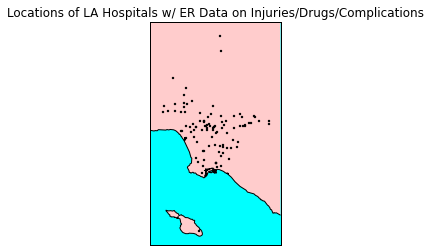

In [128]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

mapMargin = 0.1
lowerLat = min(laERData["lat"]) - mapMargin
upperLat = max(laERData["lat"]) + mapMargin
lowerLon = min(laERData["lon"]) - mapMargin
upperLon = max(laERData["lon"]) + mapMargin
m = Basemap(projection='cass',llcrnrlat=lowerLat,urcrnrlat=upperLat,\
            llcrnrlon=lowerLon,urcrnrlon=upperLon,lat_ts=20,resolution='h',lon_0=(upperLon + lowerLon)/2.0,lat_0=(upperLat + lowerLat)/2.0)
m.drawcoastlines()
m.fillcontinents(color='#ffcccc',lake_color='aqua',zorder=0)
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x, y = m(laERData["lon"].values, laERData["lat"].values)
m.scatter(x, y, marker='o', color='k', s=2)
plt.title("Locations of LA Hospitals")
plt.show()

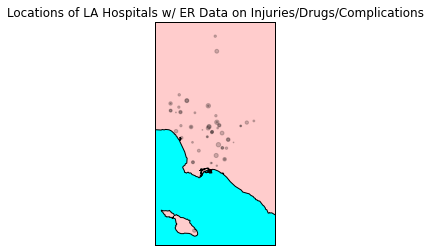

In [132]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

mapMargin = 0.1
lowerLat = min(laInjuriesDrugsComplications["lat"]) - mapMargin
upperLat = max(laInjuriesDrugsComplications["lat"]) + mapMargin
lowerLon = min(laInjuriesDrugsComplications["lon"]) - mapMargin
upperLon = max(laInjuriesDrugsComplications["lon"]) + mapMargin
m = Basemap(projection='cass',llcrnrlat=lowerLat,urcrnrlat=upperLat,\
            llcrnrlon=lowerLon,urcrnrlon=upperLon,lat_ts=20,resolution='h',lon_0=(upperLon + lowerLon)/2.0,lat_0=(upperLat + lowerLat)/2.0)
m.drawcoastlines()
m.fillcontinents(color='#ffcccc',lake_color='aqua',zorder=0)
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x, y = m(laInjuriesDrugsComplications["lon"].values, laInjuriesDrugsComplications["lat"].values)
sizeScale = max(laERData["Injuries/Drugs/Complications"]) / 20.0
m.scatter(x, y, marker='o', color='k', s=laERData["Injuries/Drugs/Complications"]/sizeScale, alpha=0.2)
plt.title("Locations of LA Hospitals w/ ER Data on Injuries/Drugs/Complications")
plt.show()

In [22]:
homelessCount = pd.read_excel("HC2016.xlsx", sheetname="Data")
homelessCount.head()

,censusTract,Year,City,CommunityName,Detailed_Name,SPA,SD,CD,SSD,AD,...,totShYouthSingYouth,totSHYouthFamHH,totShYouthFamMemb,totShYouthUnaccYouth,totUnsheltPeople,totESPeople,totTHPeople,totSHPeople,totSheltPeople,totPeople
0,221500,2016,Los Angeles,Adams,Empowerment Congress North NC,6,2,8,30,53,...,0,0,0,0,18,0,0,0,0,18
1,221601,2016,Los Angeles,Adams,Empowerment Congress North NC,6,2,8,30,53,...,0,0,0,0,21,0,0,0,0,21
2,221710,2016,Los Angeles,Adams,Empowerment Congress North NC,6,1,8,30,59,...,0,0,0,0,18,0,0,0,0,18
3,221810,2016,Los Angeles,Adams,Empowerment Congress North NC,6,2,8,30,59,...,0,0,0,0,30,0,0,0,0,30
4,221820,2016,Los Angeles,Adams,Empowerment Congress North NC,6,2,9,30,59,...,0,0,0,0,11,0,0,0,0,11


In [23]:
homelessCount.columns

Index([         u'censusTract',                 u'Year',
                       u'City',        u'CommunityName',
              u'Detailed_Name',                  u'SPA',
                         u'SD',                   u'CD',
                        u'SSD',                   u'AD',
          u'DemogSurveySample',     u'YouthCountSample',
         u'totStreetSingAdult',       u'totStreetFamHH',
           u'totStreetFamMemb',              u'totCars',
                    u'totVans',           u'totCampers',
                   u'totTents',            u'totEncamp',
               u'totCarPeople',         u'totVanPeople',
            u'totCamperPeople',        u'totTentPeople',
            u'totEncampPeople',        u'totYouthIndiv',
           u'totYouthUnaccKid',        u'totYouthFamHH',
            u'totYouthFamMemb',  u'totEsAdultSingAdult',
            u'totESAdultFamHH',    u'totEsAdultFamMemb',
        u'totEsYouthSingYouth',      u'totESYouthFamHH',
          u'totEsYouthFamMemb',

In [25]:
homelessCount["censusTract"].describe()

count      2155.000000
mean     399148.359629
std      232329.725407
min      101110.000000
25%      207102.500000
50%      402804.000000
75%      542551.500000
max      980031.000000
Name: censusTract, dtype: float64

In [29]:
import urllib3
import json
http = urllib3.PoolManager()
r = http.request('GET', 'http://data.fcc.gov/api/block/find?format=json&latitude=37.7626572&longitude=-122.2538986&showall=true')
json.loads(r.data.decode('utf-8'))

{u'Block': {u'FIPS': u'060014285002010'},
 u'County': {u'FIPS': u'06001', u'name': u'Alameda'},
 u'State': {u'FIPS': u'06', u'code': u'CA', u'name': u'California'},
 u'executionTime': u'177',
 u'status': u'OK'}

In [133]:
lons = laERData["lon"]
lats = laERData["lat"]
censusBlocks = []
http = urllib3.PoolManager()
for lon, lat in zip(lons, lats):
    r = http.request('GET', 'http://data.fcc.gov/api/block/find?format=json&latitude=' + str(lat) + '&longitude=' + str(lon) + '&showall=true')
    rData = json.loads(r.data.decode('utf-8'))
    if rData["Block"] and rData["Block"]["FIPS"]:
        censusBlocks.append(rData["Block"]["FIPS"])
    else:
        censusBlocks.append(None)
laERData["censusBlock"] = censusBlocks

In [134]:
laERData["censusTract"] = laERData["censusBlock"].apply(lambda x: float(x[5:11]))

In [135]:
laERData.head()

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,...,Neoplasms,Nervous & Sensory Systems,Other Reasons for Health Services,Perinatal Disorders,Psychoses & Neurosis,Respitory,Skin Disorders,Symptoms,censusBlock,censusTract
0,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.0,5,...,13,708,291,1,519,1186,554,2294,060374809011005,480901
1,19 - Los Angeles,11399,ANTELOPE VALLEY HOSPITAL,BLD-00737,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,34.5,3,...,217,6773,7174,237,3645,13238,3396,20237,060379007031000,900703
2,19 - Los Angeles,11417,BARLOW RESPIRATORY HOSPITAL,BLD-00730,Outpatient Clinic & Lab Addition,In Service,4,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,23.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,060379800101051,980010
3,19 - Los Angeles,11441,BEVERLY HOSPITAL,BLD-00613,Service Building & Additions (Block I),In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,10.0,1,...,36,1348,2475,27,1012,2280,1095,7161,060375301013000,530101
4,19 - Los Angeles,11480,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,BLD-00622,Tibbitts Tower A,In Service,3,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,8,...,160,3608,2785,242,3514,6414,2798,12742,060372240101001,224010


In [136]:
laERWithHomelessData = pd.merge(laERData, homelessCount, on="censusTract")
laERWithHomelessData.head()

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,...,totShYouthSingYouth,totSHYouthFamHH,totShYouthFamMemb,totShYouthUnaccYouth,totUnsheltPeople,totESPeople,totTHPeople,totSHPeople,totSheltPeople,totPeople
0,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.0,5,...,0,0,0,0,0,0,0,0,0,0
1,19 - Los Angeles,11399,ANTELOPE VALLEY HOSPITAL,BLD-00737,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,34.5,3,...,0,0,0,0,25,12,51,0,63,88
2,19 - Los Angeles,11417,BARLOW RESPIRATORY HOSPITAL,BLD-00730,Outpatient Clinic & Lab Addition,In Service,4,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,23.0,2,...,0,0,0,0,10,0,0,0,0,10
3,19 - Los Angeles,11441,BEVERLY HOSPITAL,BLD-00613,Service Building & Additions (Block I),In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,10.0,1,...,0,0,0,0,0,0,0,0,0,0
4,19 - Los Angeles,11480,CALIFORNIA HOSPITAL MEDICAL CENTER - LOS ANGELES,BLD-00622,Tibbitts Tower A,In Service,3,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,NaN,8,...,0,0,0,0,49,0,0,0,0,49


In [151]:
list(laERWithHomelessData.columns)

['County Code',
 'Perm ID',
 'Facility Name',
 'Building Nbr',
 'Building Name',
 'Building Status',
 'SPC Rating *',
 'Building URL',
 'Height (ft)',
 'Stories',
 'Building Code',
 'Building Code Year',
 'Year Completed',
 'Count',
 'Location 1',
 'lat',
 'lon',
 'Year_x',
 'oshpd_id',
 'FACILITY_NAME',
 'COUNTY_NAME',
 'Type_Of_Control',
 'ED_Level',
 'Source',
 'All Pregnancies',
 'Births',
 'Blood/Blood-forming Organs',
 'Circulatory',
 'Congenital Anomalies (Birth Defects)',
 'Digestive',
 'Endocrine/Metabolism',
 'Genitourinary',
 'Infections',
 'Injuries/Drugs/Complications',
 'Invalid',
 'Musculoskeletal',
 'Neoplasms',
 'Nervous & Sensory Systems',
 'Other Reasons for Health Services',
 'Perinatal Disorders',
 'Psychoses & Neurosis',
 'Respitory',
 'Skin Disorders',
 'Symptoms',
 'censusBlock',
 'censusTract',
 u'Year_y',
 u'City',
 u'CommunityName',
 u'Detailed_Name',
 u'SPA',
 u'SD',
 u'CD',
 u'SSD',
 u'AD',
 u'DemogSurveySample',
 u'YouthCountSample',
 u'totStreetSingAdult'

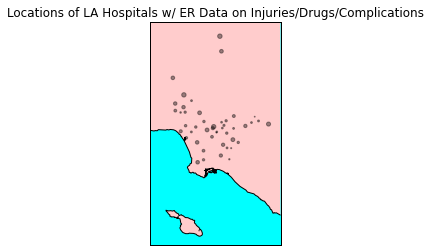

In [138]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

mapMargin = 0.1
lowerLat = min(laERWithHomelessData["lat"]) - mapMargin
upperLat = max(laERWithHomelessData["lat"]) + mapMargin
lowerLon = min(laERWithHomelessData["lon"]) - mapMargin
upperLon = max(laERWithHomelessData["lon"]) + mapMargin
m = Basemap(projection='cass',llcrnrlat=lowerLat,urcrnrlat=upperLat,\
            llcrnrlon=lowerLon,urcrnrlon=upperLon,lat_ts=20,resolution='h',lon_0=(upperLon + lowerLon)/2.0,lat_0=(upperLat + lowerLat)/2.0)
m.drawcoastlines()
m.fillcontinents(color='#ffcccc',lake_color='aqua',zorder=0)
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x, y = m(laERWithHomelessData["lon"].values, laERWithHomelessData["lat"].values)
sizeScale = max(laERWithHomelessData["Injuries/Drugs/Complications"]) / 20.0
m.scatter(x, y, marker='o', color='k', s=laERWithHomelessData["Injuries/Drugs/Complications"]/sizeScale, alpha=0.4)
plt.title("Locations of LA Hospitals w/ ER Data on Injuries/Drugs/Complications")
plt.show()

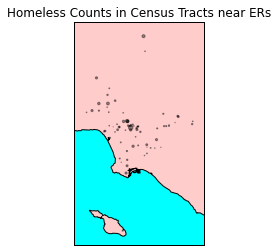

In [139]:
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

mapMargin = 0.1
lowerLat = min(laERWithHomelessData["lat"]) - mapMargin
upperLat = max(laERWithHomelessData["lat"]) + mapMargin
lowerLon = min(laERWithHomelessData["lon"]) - mapMargin
upperLon = max(laERWithHomelessData["lon"]) + mapMargin
m = Basemap(projection='cass',llcrnrlat=lowerLat,urcrnrlat=upperLat,\
            llcrnrlon=lowerLon,urcrnrlon=upperLon,lat_ts=20,resolution='h',lon_0=(upperLon + lowerLon)/2.0,lat_0=(upperLat + lowerLat)/2.0)
m.drawcoastlines()
m.fillcontinents(color='#ffcccc',lake_color='aqua',zorder=0)
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
x, y = m(laERWithHomelessData["lon"].values, laERWithHomelessData["lat"].values)
sizeScale = max(laERWithHomelessData["totPeople"]) / 20.0
m.scatter(x, y, marker='o', color='k', s=laERWithHomelessData["totPeople"]/sizeScale, alpha=0.4)
plt.title("Homeless Counts in Census Tracts near ERs")
plt.show()

In [63]:
laERWithHomelessData[["Count_y", "totPeople"]]

,Count_y,totPeople
0,2731,0
2,17181,88
4,5032,0
6,12823,49
8,614,18
10,11015,9
12,2840,2
14,9615,10
16,3119,7
18,6825,5


In [149]:
laERWithHomelessData[[u'All Pregnancies', u'Births', u'Blood/Blood-forming Organs',
       u'Circulatory', u'Congenital Anomalies (Birth Defects)', u'Digestive',
       u'Endocrine/Metabolism', u'Genitourinary', u'Infections',
       u'Injuries/Drugs/Complications', u'Invalid', u'Musculoskeletal',
       u'Neoplasms', u'Nervous & Sensory Systems',
       u'Other Reasons for Health Services', u'Perinatal Disorders',
       u'Psychoses & Neurosis', u'Respitory', u'Skin Disorders', u'Symptoms', "totPeople"]].corr()["totPeople"]

All Pregnancies                        -0.124787
Births                                       NaN
Blood/Blood-forming Organs             -0.114975
Circulatory                            -0.128163
Congenital Anomalies (Birth Defects)   -0.068484
Digestive                              -0.095824
Endocrine/Metabolism                   -0.133839
Genitourinary                          -0.139318
Infections                             -0.079219
Injuries/Drugs/Complications           -0.129776
Invalid                                      NaN
Musculoskeletal                        -0.134256
Neoplasms                              -0.085804
Nervous & Sensory Systems              -0.135698
Other Reasons for Health Services      -0.121240
Perinatal Disorders                    -0.117015
Psychoses & Neurosis                   -0.069767
Respitory                              -0.102865
Skin Disorders                         -0.145085
Symptoms                               -0.158858
totYouthFamHH       

In [152]:
censusData = pd.read_csv("zcta_tract_rel_10.csv")
censusData.head()

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,44924558,44833897,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42
1,601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,37782601,37191697,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36
2,601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,44969548,44809680,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00
3,601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,1981101,1981101,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00
4,601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,1380041,1380041,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00


In [153]:
laERHomelessCensusData = pd.merge(laERWithHomelessData, censusData, how='left', left_on='censusTract', right_on='TRACT')
laERHomelessCensusData.head()

,County Code,Perm ID,Facility Name,Building Nbr,Building Name,Building Status,SPC Rating *,Building URL,Height (ft),Stories,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.0,5,...,2753092,2743491,16.10,14.18,12.08,12.09,100.00,100.00,100.00,100.00
1,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.0,5,...,951407,951407,5.66,5.60,3.65,3.65,63.72,67.53,43.25,43.25
2,19 - Los Angeles,11386,ALHAMBRA HOSPITAL MEDICAL CENTER,BLD-00722,Hospital,In Service,2,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,64.0,5,...,951407,951407,5.61,5.32,6.38,6.38,36.28,32.47,56.75,56.75
3,19 - Los Angeles,11399,ANTELOPE VALLEY HOSPITAL,BLD-00737,Original Hospital,In Service,1,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,34.5,3,...,2598812,2598812,11.12,12.82,5.52,5.65,100.00,100.00,100.00,100.00
4,19 - Los Angeles,11417,BARLOW RESPIRATORY HOSPITAL,BLD-00730,Outpatient Clinic & Lab Addition,In Service,4,https://eserv.oshpd.ca.gov/CitizenAccess/Cap/C...,23.0,2,...,3831175,3755229,0.45,0.41,28.00,27.61,84.76,78.33,62.34,61.58


In [157]:
laERHomelessCensusData["totHomelessPerCapita"] = laERHomelessCensusData["totPeople"]/laERHomelessCensusData["POPPT"]
laERHomelessCensusData["totHomelessPerCapita"].describe()

count    317.000000
mean            inf
std             NaN
min        0.000000
25%        0.000361
50%        0.005202
75%        0.030146
max             inf
Name: totHomelessPerCapita, dtype: float64

In [158]:
laERHomelessCensusData["totPeople"].describe()

count    319.000000
mean      17.539185
std       21.172640
min        0.000000
25%        1.000000
50%        9.000000
75%       31.000000
max      187.000000
Name: totPeople, dtype: float64

In [159]:
laERHomelessCensusData["POPPT"].describe()

count     319.000000
mean     2490.122257
std      2205.695147
min         0.000000
25%       370.000000
50%      2073.000000
75%      4060.000000
max      9341.000000
Name: POPPT, dtype: float64

In [156]:
laERHomelessCensusData[[u'All Pregnancies', u'Births', u'Blood/Blood-forming Organs',
       u'Circulatory', u'Congenital Anomalies (Birth Defects)', u'Digestive',
       u'Endocrine/Metabolism', u'Genitourinary', u'Infections',
       u'Injuries/Drugs/Complications', u'Invalid', u'Musculoskeletal',
       u'Neoplasms', u'Nervous & Sensory Systems',
       u'Other Reasons for Health Services', u'Perinatal Disorders',
       u'Psychoses & Neurosis', u'Respitory', u'Skin Disorders', u'Symptoms', "totHomelessPerCapita"]].corr()["totHomelessPerCapita"]

All Pregnancies                         0.081290
Births                                 -0.044290
Blood/Blood-forming Organs              0.036403
Circulatory                             0.065491
Congenital Anomalies (Birth Defects)    0.067947
Digestive                               0.086481
Endocrine/Metabolism                    0.047145
Genitourinary                           0.077573
Infections                              0.079453
Injuries/Drugs/Complications            0.104726
Invalid                                 0.033534
Musculoskeletal                         0.110598
Neoplasms                               0.020018
Nervous & Sensory Systems               0.074490
Other Reasons for Health Services      -0.031700
Perinatal Disorders                     0.067872
Psychoses & Neurosis                    0.061525
Respitory                               0.058185
Skin Disorders                          0.092088
Symptoms                                0.142833
totHomelessPerCapita